In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Flatten images
train_images = train_images.reshape(len(train_images), -1)
test_images = test_images.reshape(len(test_images), -1)

In [4]:
gnb = GaussianNB()

In [5]:
lr = LogisticRegression(max_iter=500)

In [7]:
y_pred = gnb.fit(train_images, train_labels).predict(test_images)

In [8]:
print("Number of mislabeled points out of a total %d points : %d" % (test_images.shape[0], (test_labels != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 4144


In [9]:
y_pred = lr.fit(train_images, train_labels).predict(test_images)

/Users/teighanmiller/development/ai:ml/watai/AI Skill Showcase Submission/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("Number of mislabeled points out of a total %d points : %d" % (test_images.shape[0], (test_labels != y_pred).sum()))

Number of mislabeled points out of a total 10000 points : 1619


In [11]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_images, train_labels)
    train_score[neighbor]=knn.score(train_images, train_labels)
    test_score[neighbor]=knn.score(test_images, test_labels)

100%|██████████| 28/28 [32:10<00:00, 68.95s/it]


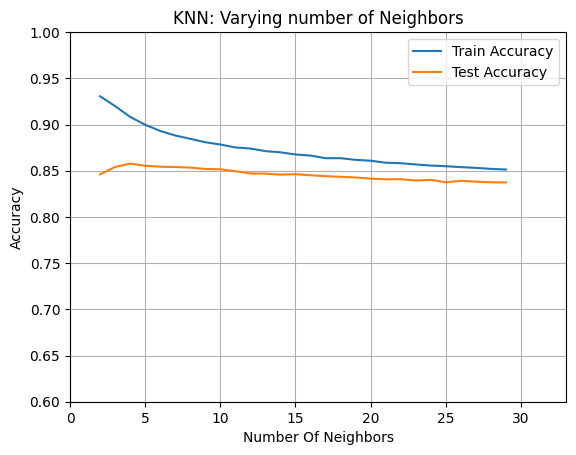

In [13]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 1.0)
plt.grid()
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=4)

In [24]:
y_pred = knn.fit(train_images, train_labels).predict(test_images)

In [25]:
print("Number of mislabeled points out of a total %d points : %d. Accuracy : %f" % (test_images.shape[0], (test_labels != y_pred).sum(), (1-(test_labels != y_pred).sum()/test_images.shape[0])*100))

Number of mislabeled points out of a total 10000 points : 1423. Accuracy : 85.770000
